In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/stock2018-2023.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#

In [ ]:
import pandas as pd
df=pd.read_excel('/content/stock2018-2023.xlsx')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [ ]:
df.info()

In [ ]:
null_values=df.isnull().sum()
print(null_values)

print(df.describe())

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64
                                Date          Open          High  \
count                           1258   1258.000000   1258.000000   
mean   2020-10-28 09:39:12.305246464  29595.823045  29776.945739   
min              2018-05-01 00:00:00  19028.360000  19121.010000   
25%              2019-07-31 06:00:00  26041.267500  26163.155000   
50%              2020-10-27 12:00:00  29201.410000  29335.685000   
75%              2022-01-26 18:00:00  33604.027500  33825.445000   
max              2023-04-28 00:00:00  36722.600000  36952.650000   
std                              NaN   4006.078299   4009.007573   

                Low        Close*   Adj Close**        Volume  
count   1258.000000   1258.000000   1258.000000  1.258000e+03  
mean   29402.432226  29599.361677  29599.361677  3.450636e+08  
min    18213.650000  18591.930000  18591.930000  8.615000e+07  

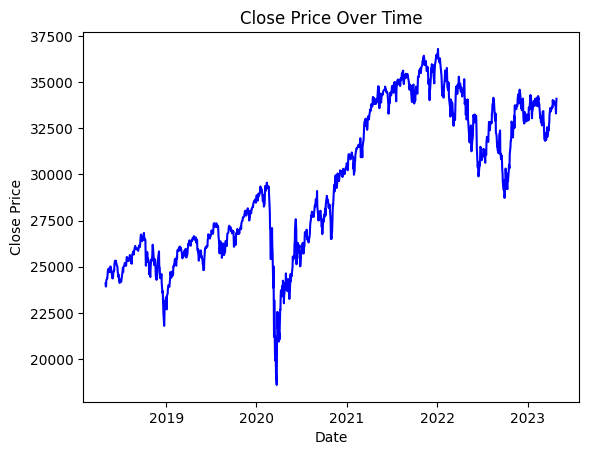

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Date']=pd.to_datetime(df['Date'])
plt.Figure(figsize=(10,6))
plt.plot(df['Date'],df['Close*'],color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
column_names=df.columns
print(column_names)

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2971
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0197
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019  
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
R-squared: 0.9608964294986125
Mean Squared Error (MSE): 0.0019130471011002087
Root Mean Squared Error (RMSE): 0.04373839390169933


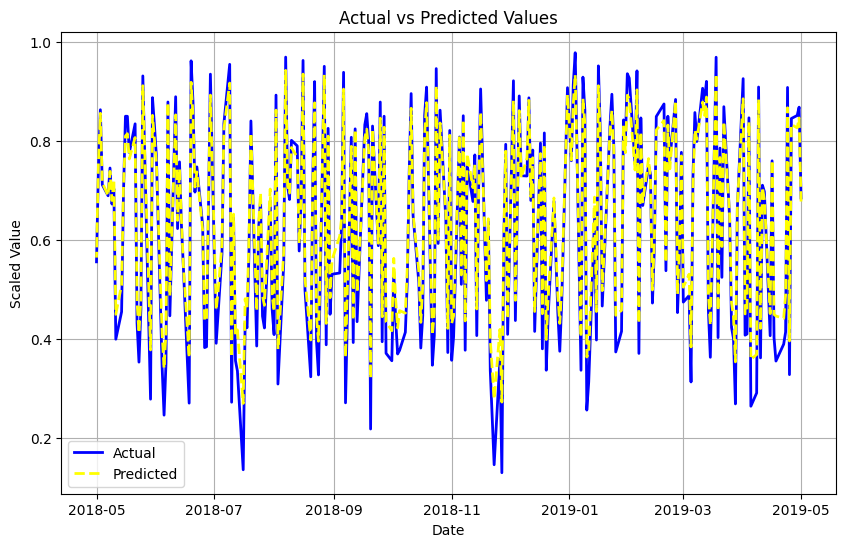

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
data = pd.read_excel('/content/stock2018-2023.xlsx')
data['Date'] = pd.to_datetime(data['Date'])

# //Normalize numerical
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Adj Close**', 'Volume', 'Close*']])

# ///Split data into (X)  (y) (target)
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

# 3. //Split the ddata into the training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# 4. //deep learning model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# 5. //Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. //Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)


Input Layer: Receives the scaled stock data features as input
.
LSTM Layer 1: Processes the sequence of data, learning temporal patterns.

LSTM Layer 2: Further processes the output from the first LSTM layer.

Dense Layer: Maps the learned features to a single prediction (the closing price).

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
# 7. //Evaluate the model
loss = model.evaluate(X_test, y_test)

# 8. //Make predictions
predictions = model.predict(X_test)

# 9. //Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

# 10. //Reshape predictions to match the shape of y_test
predictions = predictions.reshape(-1, 1)

# //Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

In [ ]:
# 11. //Plotting real vs predicted values with dates
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][len(X_train):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(data['Date'][len(X_train):], predictions, label='Predicted', color='yellow', linewidth=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.grid(True)
plt.show()

# 12. //Get user input for prediction


In [ ]:
user_input = []
features = ['Open', 'High', 'Low', 'Adj Close**', 'Volume','Close*']
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    user_input.append(value)
user_input_scaled = scaler.transform([user_input])
user_input_reshaped = user_input_scaled.reshape(1,len(features))
prediction = model.predict(user_input_reshaped)
predicted_price = scaler.inverse_transform([[0, 0, 0, 0, 0, prediction[0][0]]])[-1][-1]
print(f"Predicted Closing Price: {predicted_price}")

New

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
data = pd.read_csv('//content/Housing.csv')
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price']
price_median = y.median()
data['price_category'] = (data['price'] > price_median).astype(int)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression model
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# Binary classification model
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, data['price_category'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42).fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)
c
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# User input function
def get_user_input():
    area = float(input("Enter area of the house: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spaces: "))
    return np.array([[area, bedrooms, bathrooms, stories, parking]])

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
print(f"Predicted Price: {regressor.predict(user_input_scaled)[0]:.2f}")
print(f"Price Category: {'Above' if classifier.predict(user_input_scaled)[0] == 1 else 'Below'} Median")


# **K MEANS**

In [ ]:
c
# Select only numerical features for clustering
# Assuming 'Id' and 'Species' are non-numerical
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

kmeans = KMeans(n_clusters=3)
# Fit KMeans to the numerical features only
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


KMeans Student

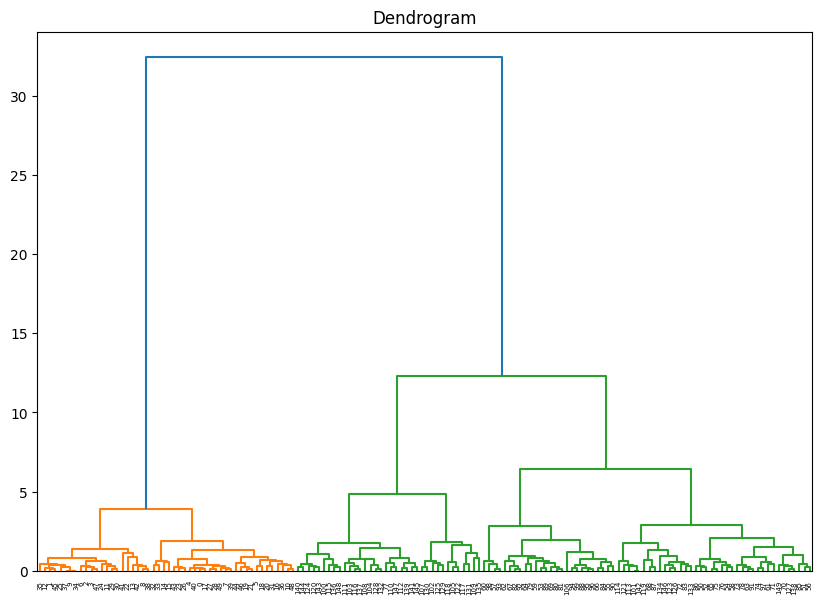

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
Z=linkage(X,'ward')
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dendrogram(Z)
plt.show()

Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1


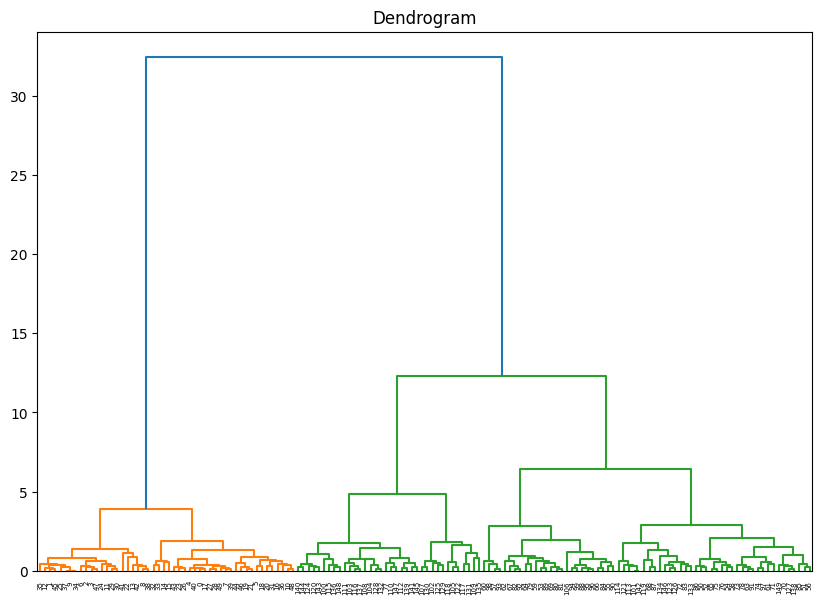

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file
data = pd.read_csv(csv_file_path)

# Select only numerical features for clustering
# Assuming 'Id' and 'Species' are non-numerical
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

kmeans = KMeans(n_clusters=3)
# Fit KMeans to the numerical features only
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot  as plt
Z=linkage(X,'ward')
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dendrogram(Z)
plt.show()

# **Clustering**

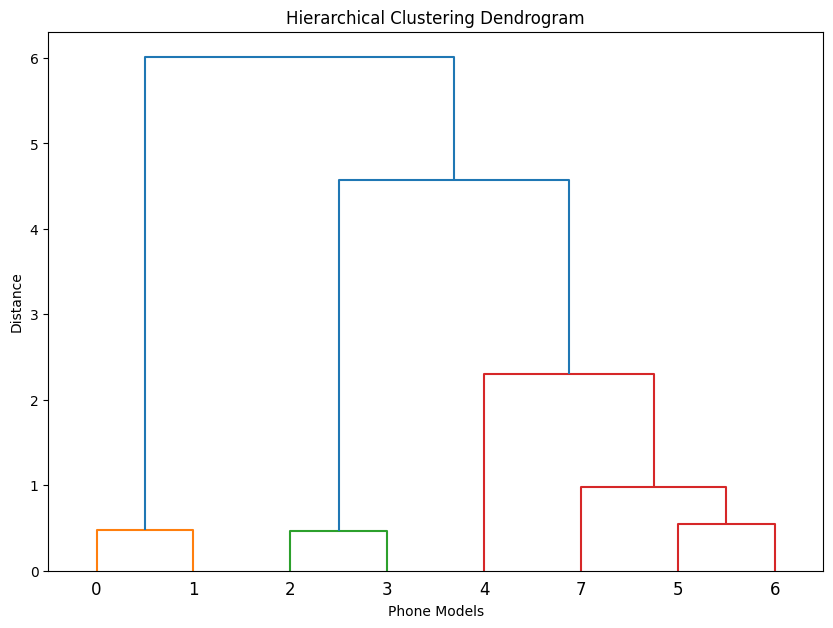

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (rs)  Cluster  
0               1170       79900        0  
1               1170       69900        0  
2               1080       79900        0  
3               1080       84900        0  
4               1080       59900        0  
5               1080       44900        0  
6               1080       35000        0  
7               1080      

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Step 1: Load the mobile display data (same as before)
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Agglomerative Hierarchical Clustering
# Use distance_threshold instead of n_clusters
agglomerative_clustering = AgglomerativeClustering(distance_threshold=50, linkage='ward', n_clusters=None)
df['Cluster'] = agglomerative_clustering.fit_predict(scaled_features)

# Step 6: Visualize the dendrogram to understand the clustering hierarchy
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Phone Models')
plt.ylabel('Distance')
plt.show()

# Step 7: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)', 'Cluster']])

# **new**

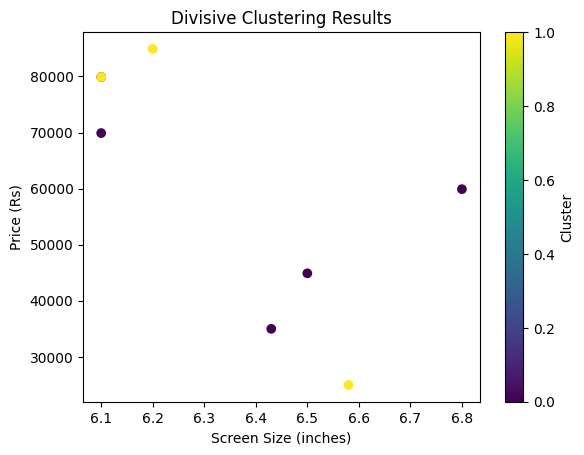

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900      0.0  
1               1170       69900      0.0  
2               1080       79900      1.0  
3               1080       84900      1.0  
4               1080       59900      0.0  
5               1080       44900      0.0  
6               1080       35000      0.0  
7               1080      

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])] # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0]) # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]]) # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])


# New

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_clusters_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,)

# **Dimensionality Reduction**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file
data = pd.read_csv(csv_file_path)


# Chess

In [ ]:
from IPython import get_ipython
from IPython.display import display
!pip install python-chess
import chess
import random
import numpy as np
board = chess.Board()
Q = {}
alpha =0.1
gamma = 0.9
epsilon = 0.1
n_episodes = 1000
def state_to_string(state):
    return state.fen()
def get_valid_moves(state):
    return list(state.legal_moves)
def update_q_value(state, action, reward, next_state):
  current_q = Q.get((state_to_string(state),action),0)
  max_future_q = max([Q.get((state_to_string(next_state),next_action),0)for next_action in get_valid_moves(next_state)],default=0)
  Q[(state_to_string(state),action)] = current_q + alpha * (reward + gamma * max_future_q - current_q)
def choose_action(state):
    if random.uniform(0,1) < epsilon:
        return random.choice(get_valid_moves(state))
    else:
      valid_moves = get_valid_moves(state)
      q_values = [Q.get((state_to_string(state),move),0)for move in valid_moves]
      max_q = max(q_values)
      best_moves = [valid_moves[i] for i,q in enumerate(q_values)if q == max_q]
      return random.choice(best_moves)
def get_reward(state, action, next_state):
  if next_state.is_checkmate():
    return 1
  elif next_state.is_stalemate() or next_state.is_insufficient_material():
    return 0.5
  elif next_state.is_game_over():
    return -1
  else:
    return 0
def play_game():
  board = chess.Board()
  total_reward = 0
  done = False
  while not done:
    current_state = board.copy()
    action = choose_action(board)
    board.push(action)
    reward = get_reward(current_state, action, board)
    total_reward += reward  # Or total_reward += get_reward(current_state, action, board)
    next_state = board.copy()

    update_q_value(current_state, action, reward, next_state)
    if board.is_game_over():
      done = True
  return total_reward
def train_agent():
  """Train the Q-learning agent by playing multiple games."""
  for episode in range(n_episodes):
    reward = play_game()
    if episode % 100 == 0:
      print(f"Episode {episode}/{n_episodes}:Total Reward = {reward}")

train_agent()

def test_agent():
  board = chess.Board()
  while not board.is_game_over():
    if board.turn == chess.WHITE:
      action = choose_action(board)
      print("Agent plays:",action)
    else:
      action = random.choice(get_valid_moves(board))
      print("Opponent plays:",action)
      board.push(action)
      print(board)
test_agent()




Streaming output truncated to the last 5000 lines.
Agent plays: a2a3
Agent plays: b2b3
Agent plays: f2f3
Agent plays: b1c3
Agent plays: a2a4
Agent plays: b1a3
Agent plays: g2g4
Agent plays: g2g3
Agent plays: f2f3
Agent plays: b1c3
Agent plays: a2a4
Agent plays: c2c3
Agent plays: b2b4
Agent plays: g2g3
Agent plays: b1a3
Agent plays: b1c3
Agent plays: a2a4
Agent plays: b1a3
Agent plays: b1a3
Agent plays: g1h3
Agent plays: b2b3
Agent plays: b2b3
Agent plays: c2c3
Agent plays: c2c4
Agent plays: g2g4
Agent plays: a2a4
Agent plays: b2b3
Agent plays: f2f3
Agent plays: d2d4
Agent plays: b2b4
Agent plays: h2h4
Agent plays: d2d4
Agent plays: f2f4
Agent plays: f2f3
Agent plays: c2c3
Agent plays: d2d4
Agent plays: g1h3
Agent plays: g2g3
Agent plays: h2h3
Agent plays: c2c3
Agent plays: f2f3
Agent plays: h2h3
Agent plays: d2d3
Agent plays: e2e3
Agent plays: h2h3
Agent plays: h2h3
Agent plays: g2g4
Agent plays: d2d4
Agent plays: f2f3
Agent plays: h2h4
Agent plays: c2c3
Agent plays: d2d4
Agent plays: 